## Analysis of Air quality sensors in Red Hook

In [2]:
#importing all the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
red_hook = pd.read_csv('Data/LuxDustNoise_summarized_4hour_0719.csv')

Location:

sensor_0 : RHI roof (at corner of Hicks and W 9th streets, elevation approx. 8m) - 767 Hicks St, Brooklyn, NY 11231

sensor_3 : RHI entrance (on Hicks street at street level) - 767 Hicks St, Brooklyn, NY 11231

sensor_2 : TechLab (at ground level) - 106 Ferris St

sensor_4 : PioneerWorks roof (elevation approx. 15m) - 159 Pioneer St, Brooklyn, NY 11231

Units: for luminosity (in Lux), particulate concentration (particle count per 0.01 cubic feet), and noise (sound pressure level in dB)

In [4]:
red_hook.head()

,dt,sensor,lux,con,spl
0,2016-06-21 00:00:00,sensor_0,0.0,2834.03125,66.308479
1,2016-06-21 00:00:00,sensor_2,0.0,1691.99625,70.375943
2,2016-06-21 00:00:00,sensor_3,0.0,1686.44125,76.235738
3,2016-06-21 00:00:00,sensor_4,0.0,2324.65875,70.652334
4,2016-06-21 04:00:00,sensor_0,3213.5,2748.28875,81.467436


In [5]:
red_hook.drop('lux', axis=1, inplace = True)

In [6]:
red_hook.dt = pd.to_datetime(red_hook.dt)

In [7]:
red_hook['date'] = pd.to_datetime(red_hook.dt).apply( lambda x: x.date() )
red_hook['time'] = pd.to_datetime(red_hook.dt).apply( lambda x: x.time() )
red_hook.head(10)

,dt,sensor,con,spl,date,time
0,2016-06-21 00:00:00,sensor_0,2834.03125,66.308479,2016-06-21,00:00:00
1,2016-06-21 00:00:00,sensor_2,1691.99625,70.375943,2016-06-21,00:00:00
2,2016-06-21 00:00:00,sensor_3,1686.44125,76.235738,2016-06-21,00:00:00
3,2016-06-21 00:00:00,sensor_4,2324.65875,70.652334,2016-06-21,00:00:00
4,2016-06-21 04:00:00,sensor_0,2748.28875,81.467436,2016-06-21,04:00:00
5,2016-06-21 04:00:00,sensor_2,2550.94500,72.334450,2016-06-21,04:00:00
6,2016-06-21 04:00:00,sensor_3,2041.33000,79.445869,2016-06-21,04:00:00
7,2016-06-21 04:00:00,sensor_4,3041.73875,81.499422,2016-06-21,04:00:00
8,2016-06-21 08:00:00,sensor_0,2720.35125,80.020600,2016-06-21,08:00:00
9,2016-06-21 08:00:00,sensor_2,3088.82750,76.372047,2016-06-21,08:00:00


In [8]:
#separating the sensors
sensor0 = red_hook[red_hook.sensor=='sensor_0']
sensor2 = red_hook[red_hook.sensor=='sensor_2']
sensor3 = red_hook[red_hook.sensor=='sensor_3']
sensor4 = red_hook[red_hook.sensor=='sensor_4']

## Time Series 

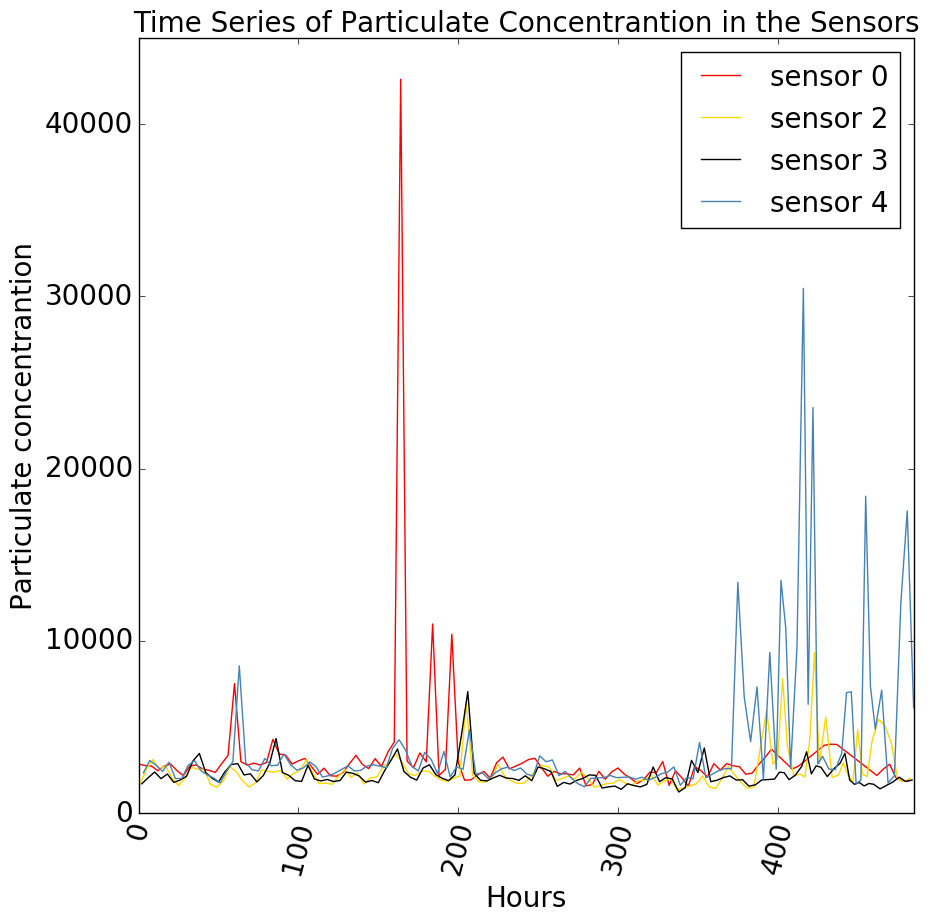

In [9]:
ax = sensor0.con.plot(figsize=(10,10), color="Red", label ='sensor 0')
ax = sensor2.con.plot(figsize=(10,10), color="Gold", label ='sensor 2')
ax = sensor3.con.plot(figsize=(10,10), color="Black", label ='sensor 3')
ax = sensor4.con.plot(figsize=(10,10), color="SteelBlue", label ='sensor 4')

plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-20, plt.ylim()[1])
plt.legend(loc ='best', fontsize=20)
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Particulate concentrantion", fontsize=20)
plt.title('Time Series of Particulate Concentrantion in the Sensors', fontsize=20)
plt.show()

**Fig.1:** Time Series of Particulate Concentrantion (particle count per 0.01 cubic feet) by hour measured by sensors.It can be seen that sensor 0 and 2 has to clear spikes but in the majority of the time the concentration in the 4 sensors are pretty similar.

In [18]:
## Deparating every sensor to analyze independenly

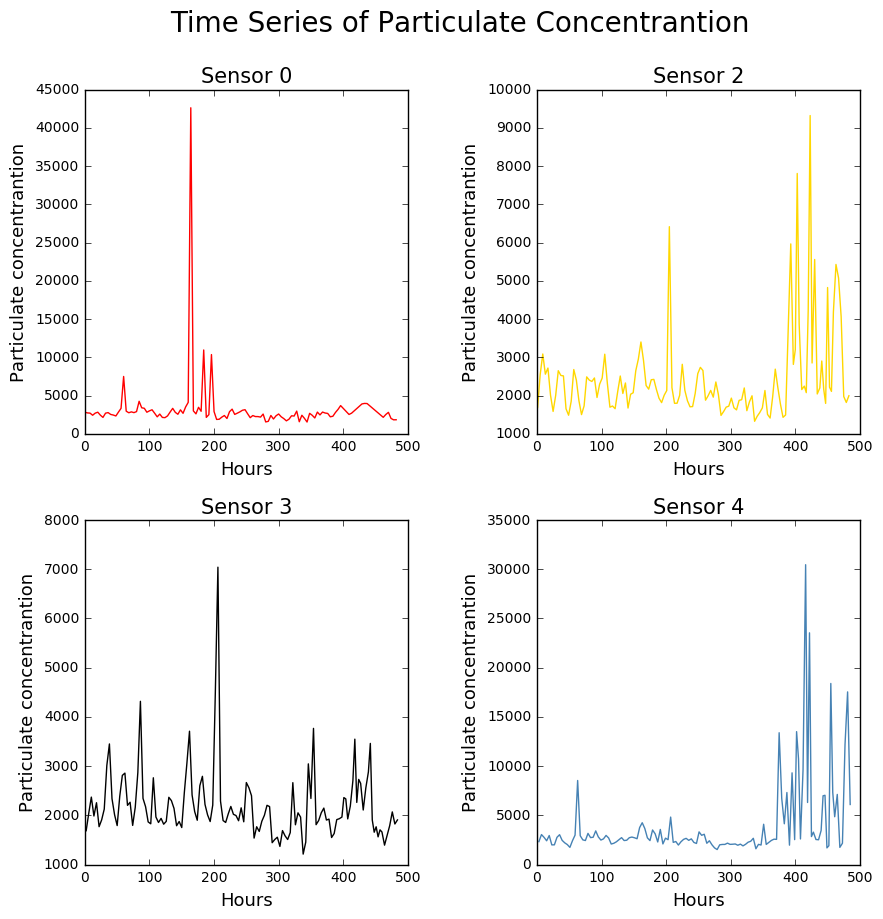

In [57]:
fs = 15

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

ax = axes[0,0]
ax.plot(sensor0.con, color="Red", label ='sensor 0')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 0', fontsize=fs)

ax = axes[0,1]
ax.plot(sensor2.con, color="Gold", label ='sensor 2')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 2', fontsize=fs)


ax = axes[1,0]
ax.plot(sensor3.con, color="Black", label ='sensor 3')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 3', fontsize=fs)

ax = axes[1,1]
ax.plot(sensor4.con, color="SteelBlue", label ='sensor 4')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 4', fontsize=fs)


fig.suptitle('Time Series of Particulate Concentrantion', fontsize=fs+5)
fig.subplots_adjust(wspace = 0.4 , hspace = 0.25)

plt.show()

**Fig.1:** Time Series of Particulate Concentrantion (particle count per 0.01 cubic feet) by hour measured by sensor 0 located at RHI roof (at corner of Hicks and W 9th streets, elevation approx. 8m) - 767 Hicks St, Brooklyn, NY 11231. It can be seen that there is a spike that has to be detected later in the Detenction event.

**Fig.3:** Time Series of Particulate Concentrantion (particle count per 0.01 cubic feet) by hour measured by sensor 2 located at TechLab (at ground level) - 106 Ferris St. It can be seen that there are some spikes that catched the attention. Later the most relevant will be analysed.

**Fig.4:** Time Series of Particulate Concentrantion (particle count per 0.01 cubic feet) by hour measured by sensor 3 located at RHI entrance (on Hicks street at street level) - 767 Hicks St, Brooklyn, NY 11231. It can be seen a spike that catched the attention. Later the most relevant will be analysed.

**Fig.5:** Time Series of Particulate Concentrantion (particle count per 0.01 cubic feet) by hour measured by sensor 4 located at PioneerWorks roof (elevation approx. 15m) - 159 Pioneer St, Brooklyn, NY 11231. It can be seen some spikes at the end of the data.

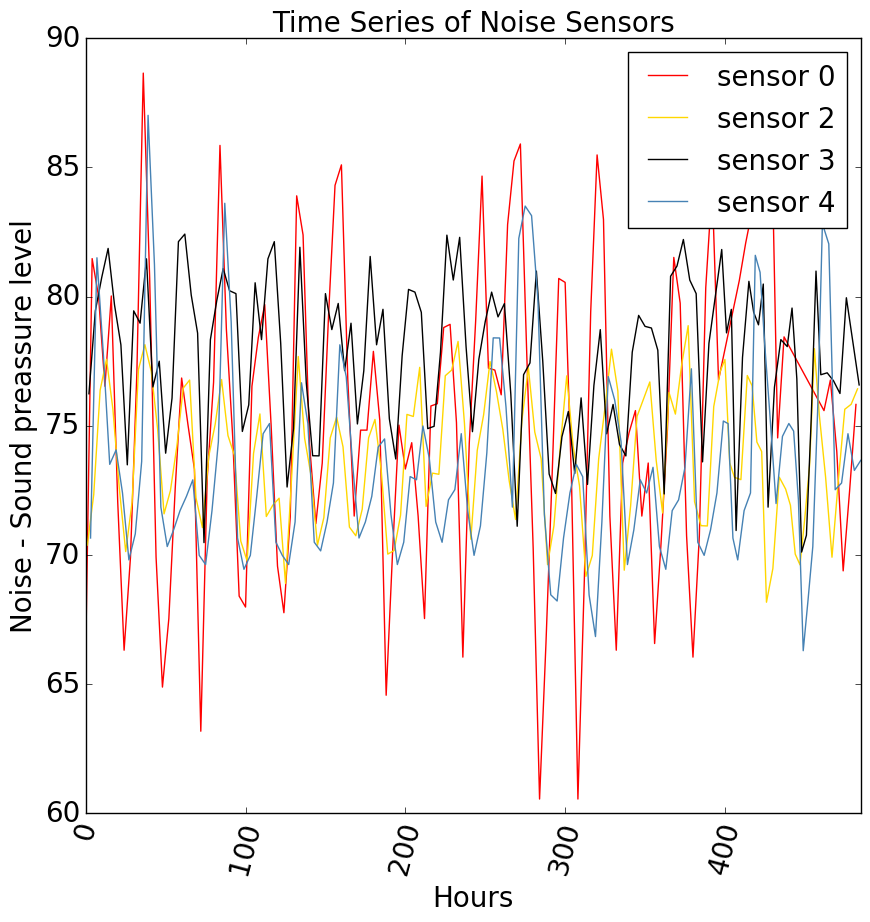

In [16]:
ax = sensor0.spl.plot(figsize=(10,10), color="Red", label ='sensor 0')
ax = sensor2.spl.plot(figsize=(10,10), color="Gold", label ='sensor 2')
ax = sensor3.spl.plot(figsize=(10,10), color="Black", label ='sensor 3')
ax = sensor4.spl.plot(figsize=(10,10), color="SteelBlue", label ='sensor 4')

plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Noise - Sound preassure level", fontsize=20)
plt.title('Time Series of Noise Sensors', fontsize=20)

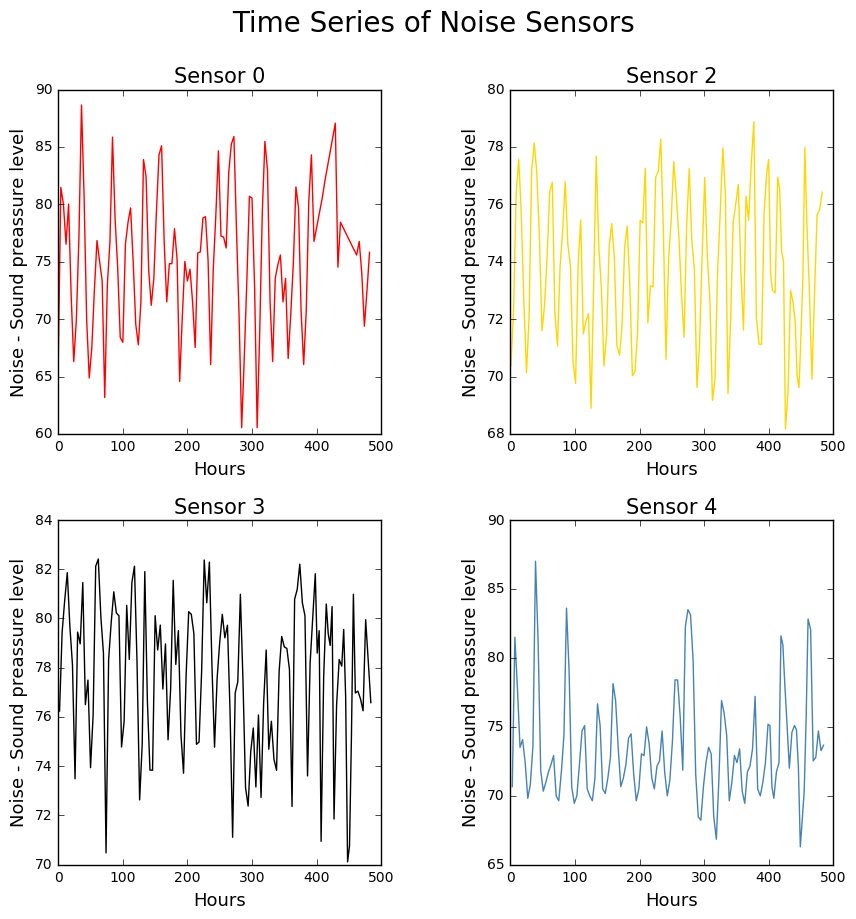

In [59]:
fs = 15

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

ax = axes[0,0]
ax.plot(sensor0.spl, color="Red", label ='sensor 0')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Noise - Sound preassure level", fontsize=fs-2)
ax.set_title('Sensor 0', fontsize=fs)

ax = axes[0,1]
ax.plot(sensor2.spl, color="Gold", label ='sensor 2')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Noise - Sound preassure level", fontsize=fs-2)
ax.set_title('Sensor 2', fontsize=fs)


ax = axes[1,0]
ax.plot(sensor3.spl, color="Black", label ='sensor 3')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Noise - Sound preassure level", fontsize=fs-2)
ax.set_title('Sensor 3', fontsize=fs)

ax = axes[1,1]
ax.plot(sensor4.spl, color="SteelBlue", label ='sensor 4')
ax.set_xlabel("Hours", fontsize=fs-2)
ax.set_ylabel("Noise - Sound preassure level", fontsize=fs-2)
ax.set_title('Sensor 4', fontsize=fs)


fig.suptitle('Time Series of Noise Sensors', fontsize=fs+5)
fig.subplots_adjust(wspace = 0.4 , hspace = 0.25)

plt.show()

**Fig. 7:** Time Series of noise (sound pressure level in dB) by hour measured by sensor 0 located at RHI roof (at corner of Hicks and W 9th streets, elevation approx. 8m) - 767 Hicks St, Brooklyn, NY 11231. It can be seen that time series is uniform.

**Fig.8:** Time Series of noise (sound pressure level in dB) by hour measured by sensor 2 located at TechLab (at ground level) - 106 Ferris St. It can be seen as very uniform


**Fig. 9:** Time Series of noise (sound pressure level in dB) by hour measured by sensor measured by sensor 3 located at RHI entrance (on Hicks street at street level) - 767 Hicks St, Brooklyn, NY 11231. It can be seen as very uniform

**Fig. 9:** Time Series of noise (sound pressure level in dB) by hour measured by sensor measured by sensor 4 located at PioneerWorks roof (elevation approx. 15m) - 159 Pioneer St, Brooklyn, NY 11231. It can be seen that as well it is uniform distributed.

In [60]:
#Histograms

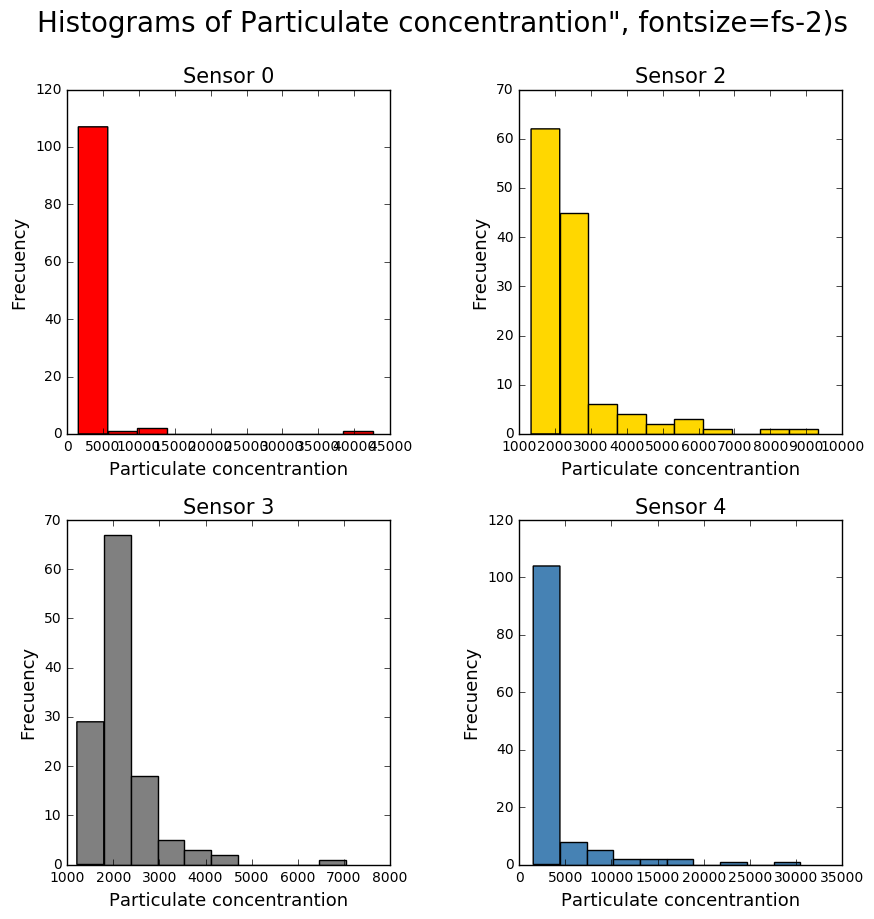

In [80]:
s = 15

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

ax = axes[0,0]
ax.hist(sensor0.con, color="Red", label ='sensor 0')
ax.set_ylabel("Frecuency", fontsize=fs-2)
ax.set_xlabel("Particulate concentrantion", fontsize=fs-2)
ax.set_xticklabels?
ax.set_title('Sensor 0', fontsize=fs)

ax = axes[0,1]
ax.hist(sensor2.con, color="Gold", label ='sensor 2')
ax.set_ylabel("Frecuency", fontsize=fs-2)
ax.set_xlabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 2', fontsize=fs)


ax = axes[1,0]
ax.hist(sensor3.con, color="Grey", label ='sensor 3')
ax.set_ylabel("Frecuency", fontsize=fs-2)
ax.set_xlabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 3', fontsize=fs)

ax = axes[1,1]
ax.hist(sensor4.con, color="SteelBlue", label ='sensor 4')
ax.set_ylabel("Frecuency", fontsize=fs-2)
ax.set_xlabel("Particulate concentrantion", fontsize=fs-2)
ax.set_title('Sensor 4', fontsize=fs)


fig.suptitle('Histograms of Particulate concentrantion", fontsize=fs-2)s', fontsize=fs+5)
fig.subplots_adjust(wspace = 0.4 , hspace = 0.25)

plt.show()

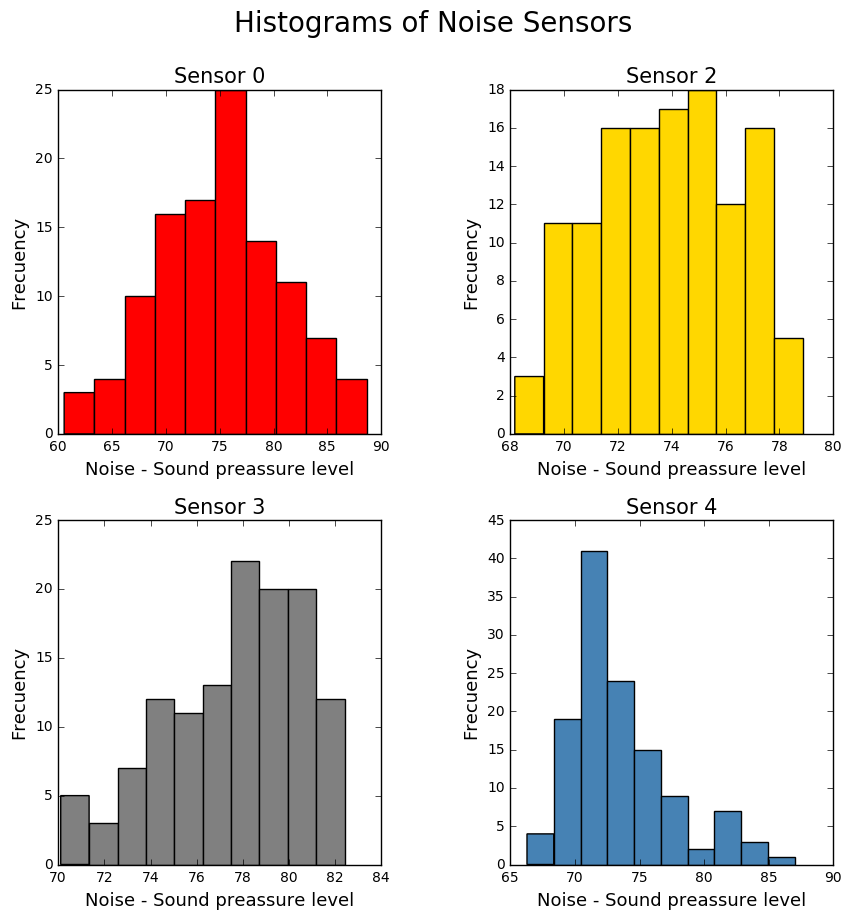

In [73]:
s = 15

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

ax = axes[0,0]
ax.hist(sensor0.spl, color="Red", label ='sensor 0')
ax.set_ylabel("Frecuency", fontsize=fs-2)
ax.set_xlabel("Noise - Sound preassure level", fontsize=fs-2)
ax.set_title('Sensor 0', fontsize=fs)

ax = axes[0,1]
ax.hist(sensor2.spl, color="Gold", label ='sensor 2')
ax.set_ylabel("Frecuency", fontsize=fs-2)
ax.set_xlabel("Noise - Sound preassure level", fontsize=fs-2)
ax.set_title('Sensor 2', fontsize=fs)


ax = axes[1,0]
ax.hist(sensor3.spl, color="Grey", label ='sensor 3')
ax.set_ylabel("Frecuency", fontsize=fs-2)
ax.set_xlabel("Noise - Sound preassure level", fontsize=fs-2)
ax.set_title('Sensor 3', fontsize=fs)

ax = axes[1,1]
ax.hist(sensor4.spl, color="SteelBlue", label ='sensor 4')
ax.set_ylabel("Frecuency", fontsize=fs-2)
ax.set_xlabel("Noise - Sound preassure level", fontsize=fs-2)
ax.set_title('Sensor 4', fontsize=fs)


fig.suptitle('Histograms of Noise Sensors', fontsize=fs+5)
fig.subplots_adjust(wspace = 0.4 , hspace = 0.25)

plt.show()